# Homework Assignment Number One

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Section 1: Police killings

In [2]:
# print (3)

In [3]:
killings = pd.read_csv('../data/police-killings.csv', index_col=[0], encoding="ISO-8859-1")
killings.head()
killings.shape
killings.month.value_counts()
killings.head()

name  age gender    raceethnicity     month  day  year  \
0  A'donte Washington   16   Male            Black  February   23  2015   
1      Aaron Rutledge   27   Male            White     April    2  2015   
2         Aaron Siler   26   Male            White     March   14  2015   
3        Aaron Valdez   25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic   29   Male            White     March   19  2015   

            streetaddress          city state  \
0            Clearview Ln     Millbrook    AL   
1  300 block Iris Park Dr     Pineville    LA   
2    22nd Ave and 56th St       Kenosha    WI   
3       3000 Seminole Ave    South Gate    CA   
4          364 Hiwood Ave  Munroe Falls    OH   

              lawenforcementagency    cause    armed  county_income  
0      Millbrook Police Department  Gunshot       No          54766  
1  Rapides Parish Sheriff's Office  Gunshot       No          40930  
2        Kenosha Police Department  Gunshot       No          54930  
3     South Gate Police Department  Gunshot  Firearm          55909  
4           Kent Police Department  Gunshot       No          49669

### 1. Make the following changes to column names:

- lawenforcementagency -> agency
- raceethnicity -> race

In [4]:
kk = killings.rename(columns={'lawenforcementagency':'agency',
                        'raceethnicity':'race'})

### 2. Show the count of missing values in each column

In [8]:
kk.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 3. Replace each null value in the dataframe with the string "unknown"

In [7]:
kk.fillna('unknown', inplace=True)
kk.head()

name  age gender             race     month  day  year  \
0  A'donte Washington   16   Male            Black  February   23  2015   
1      Aaron Rutledge   27   Male            White     April    2  2015   
2         Aaron Siler   26   Male            White     March   14  2015   
3        Aaron Valdez   25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic   29   Male            White     March   19  2015   

            streetaddress          city state  \
0            Clearview Ln     Millbrook    AL   
1  300 block Iris Park Dr     Pineville    LA   
2    22nd Ave and 56th St       Kenosha    WI   
3       3000 Seminole Ave    South Gate    CA   
4          364 Hiwood Ave  Munroe Falls    OH   

                            agency    cause    armed  county_income  
0      Millbrook Police Department  Gunshot       No          54766  
1  Rapides Parish Sheriff's Office  Gunshot       No          40930  
2        Kenosha Police Department  Gunshot       No          54930  
3     South Gate Police Department  Gunshot  Firearm          55909  
4           Kent Police Department  Gunshot       No          49669

### 4. How many killings were there in March and April?

In [9]:
kk.month.value_counts()

March       114
April        96
January      90
February     84
May          81
June          2
Name: month, dtype: int64

In [10]:
kk[(kk.month == "March") | (kk.month == 'April')].shape[0]

210

### 5. How many male and how many female victims are there?

In [11]:
kk.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

### 6. How many killings were of unarmed people?

In [12]:
kk[(kk.armed == 'No')].shape[0]

102

### 7. What percentage of all killings were unarmed?

In [13]:
kk.armed.value_counts(normalize=True)['No']*100

21.841541755888652

### 8. What are the 5 states with the most killings?

In [14]:
kk.state.value_counts().head()

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

### 9. Show a value counts of deaths for each race

In [15]:
kk.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

### 10. Display a histogram of ages of all killings

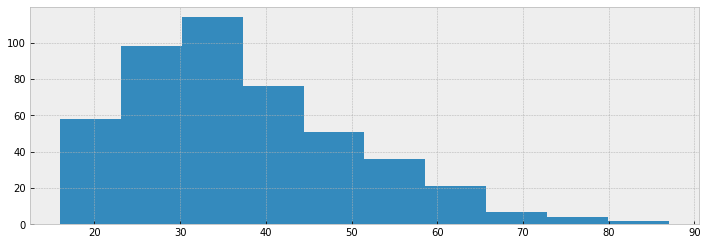

In [509]:
plt.style.use('bmh')
plt.figure(figsize=(12,4))
plt.hist(kk.age, bins=10)
plt.show()

### 11. Show histogram of ages for each race

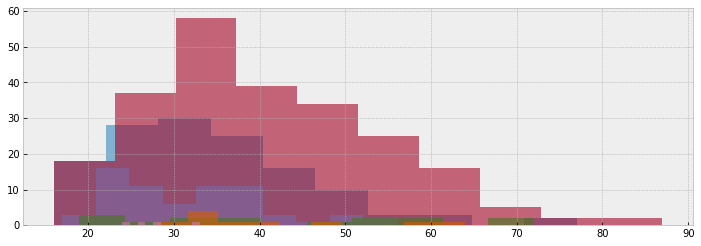

In [508]:
rs = kk.race.unique()
plt.figure(figsize=(12,4))
for r in rs:
    rr= kk[kk.race == r]
    plt.hist(rr.age, alpha= .6)

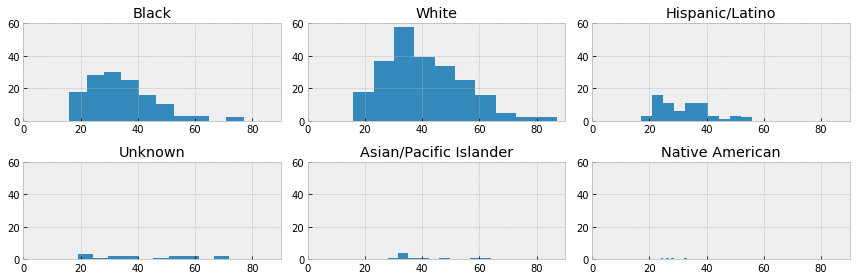

In [74]:
rs = kk.race.unique()
plt.figure(figsize=(12,4))
for idx,r in enumerate(rs):
    rr= kk[kk.race == r]
    plt.subplot(2,3,idx+1)
    plt.title(r)
    plt.axis((0,90,0,60))
    plt.hist(rr.age,bins=10)
plt.tight_layout()
plt.show()

### 12. What is the average age of death by race?

In [79]:
kk.groupby("race")["age"].mean().sort_values(ascending=False)

race
Unknown                   43.533333
Asian/Pacific Islander    40.800000
White                     40.466102
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Name: age, dtype: float64

### 13. Show a bar chart with counts of deaths every month

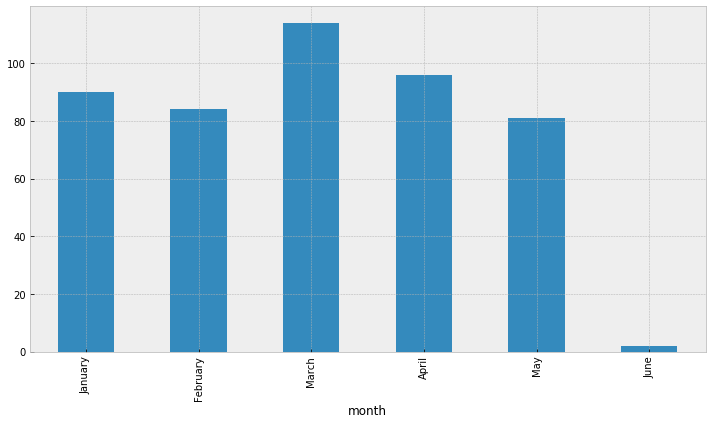

In [507]:


mm = kk.groupby("month")["name"].count()
mm.index = pd.CategoricalIndex(mm.index,
                              categories=['January','February','March','April','May','June','July'],
                              sorted=True)
mm = mm.sort_index()
mm.plot(kind="bar",figsize=(10,6))
plt.tight_layout()
plt.show()

## Section 2: College Majors

In [106]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.head()

Major_code                                  Major  \
0        1100                    GENERAL AGRICULTURE   
1        1101  AGRICULTURE PRODUCTION AND MANAGEMENT   
2        1102                 AGRICULTURAL ECONOMICS   
3        1103                        ANIMAL SCIENCES   
4        1104                           FOOD SCIENCE   

                    Major_category   Total  Employed  \
0  Agriculture & Natural Resources  128148     90245   
1  Agriculture & Natural Resources   95326     76865   
2  Agriculture & Natural Resources   33955     26321   
3  Agriculture & Natural Resources  103549     81177   
4  Agriculture & Natural Resources   24280     17281   

   Employed_full_time_year_round  Unemployed  Unemployment_rate  Median  \
0                          74078        2423           0.026147   50000   
1                          64240        2266           0.028636   54000   
2                          22810         821           0.030248   63000   
3                          64937        3619           0.042679   46000   
4                          12722         894           0.049188   62000   

   P25th    P75th  
0  34000  80000.0  
1  36000  80000.0  
2  40000  98000.0  
3  30000  72000.0  
4  38500  90000.0

### 1. Delete the columns (employed_full_time_year_round, major_code)


In [107]:
majors.drop(['Employed_full_time_year_round','Major_code'], axis=1, inplace=True)

In [113]:
majors.head()


Major                   Major_category  \
0                    GENERAL AGRICULTURE  Agriculture & Natural Resources   
1  AGRICULTURE PRODUCTION AND MANAGEMENT  Agriculture & Natural Resources   
2                 AGRICULTURAL ECONOMICS  Agriculture & Natural Resources   
3                        ANIMAL SCIENCES  Agriculture & Natural Resources   
4                           FOOD SCIENCE  Agriculture & Natural Resources   

    Total  Employed  Unemployed  Unemployment_rate  Median  P25th    P75th  
0  128148     90245        2423           0.026147   50000  34000  80000.0  
1   95326     76865        2266           0.028636   54000  36000  80000.0  
2   33955     26321         821           0.030248   63000  40000  98000.0  
3  103549     81177        3619           0.042679   46000  30000  72000.0  
4   24280     17281         894           0.049188   62000  38500  90000.0

### 2. Show the count of missing values in each column

In [111]:
majors.isnull().sum()

Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

### 3. What are the top 10 highest paying majors?

In [117]:
majors.sort_values(by="Median",ascending=False).head(10)

Major  \
59                               PETROLEUM ENGINEERING   
154  PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...   
57           NAVAL ARCHITECTURE AND MARINE ENGINEERING   
55                           METALLURGICAL ENGINEERING   
58                                 NUCLEAR ENGINEERING   
56                      MINING AND MINERAL ENGINEERING   
97                    MATHEMATICS AND COMPUTER SCIENCE   
48                              ELECTRICAL ENGINEERING   
45                                CHEMICAL ENGINEERING   
51              GEOLOGICAL AND GEOPHYSICAL ENGINEERING   

              Major_category   Total  Employed  Unemployed  Unemployment_rate  \
59               Engineering   19631     14002         617           0.042205   
154                   Health  180084    124058        4414           0.034358   
57               Engineering   16094     10690         449           0.040309   
55               Engineering   12818      6939         326           0.044873   
58               Engineering    9826      7320         527           0.067159   
56               Engineering   10746      7416         366           0.047032   
97   Computers & Mathematics    7184      5874         150           0.024900   
48               Engineering  671647    489965       26064           0.050509   
45               Engineering  188046    131697        6388           0.046261   
51               Engineering    6264      4120           0           0.000000   

     Median  P25th     P75th  
59   125000  75000  210000.0  
154  106000  78000  125000.0  
57    97000  60000  125000.0  
55    96000  65000  123000.0  
58    95000  65000  128000.0  
56    92000  52000  124000.0  
97    92000  53000  136000.0  
48    88000  60000  116000.0  
45    86000  60000  120000.0  
51    85000  55000  125000.0

### 4. Plot the data from the last question in a bar chart, include proper title, and labels


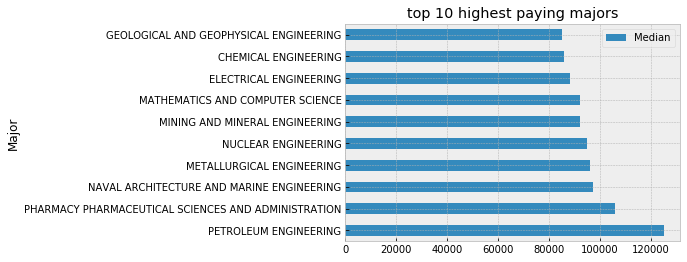

In [153]:
p=majors.sort_values(by="Median",ascending=False).head(10)
pp=p[['Major','Median']]
pp.set_index('Major',inplace=True)
pp.plot(kind="barh")
plt.title("top 10 highest paying majors")
plt.show()

### 5. What is the average median salary for each major category?

In [157]:
majors.groupby("Major_category")['Median'].mean().sort_values(ascending=False)

Major_category
Engineering                            77758.620690
Computers & Mathematics                66272.727273
Physical Sciences                      62400.000000
Business                               60615.384615
Health                                 56458.333333
Agriculture & Natural Resources        55000.000000
Social Science                         53222.222222
Law & Public Policy                    52800.000000
Industrial Arts & Consumer Services    52642.857143
Biology & Life Science                 50821.428571
Communications & Journalism            49500.000000
Humanities & Liberal Arts              46080.000000
Psychology & Social Work               44555.555556
Education                              43831.250000
Arts                                   43525.000000
Interdisciplinary                      43000.000000
Name: Median, dtype: float64

### 6. Visualize only the top 5 paying major categories

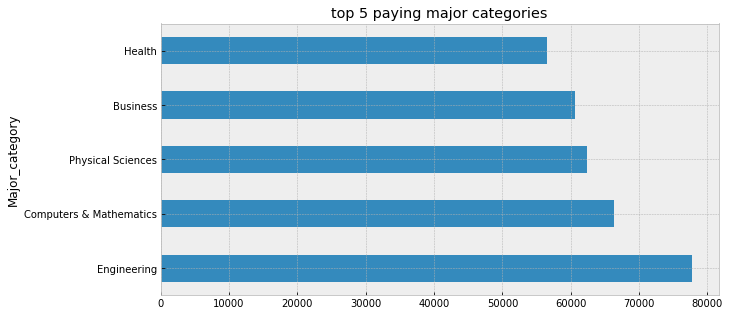

In [505]:
m = majors.groupby("Major_category")['Median'].mean().sort_values(ascending=False).head()
m.plot(kind="barh",figsize=(10,5))
plt.title("top 5 paying major categories")
plt.show()

### 7. Plot a histogram of the distribution of median salaries

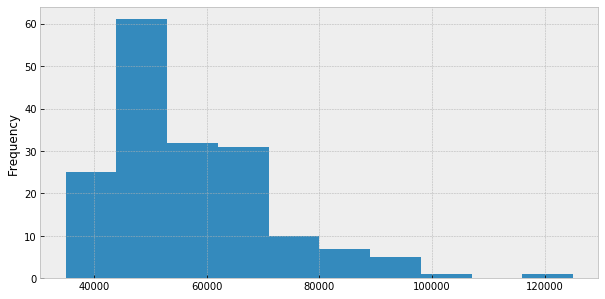

In [503]:
ms = majors.Median
ms.plot(kind="hist",figsize=(10,5))
plt.show()

### 8. Plot a histogram of the distribution of median salaries by major category

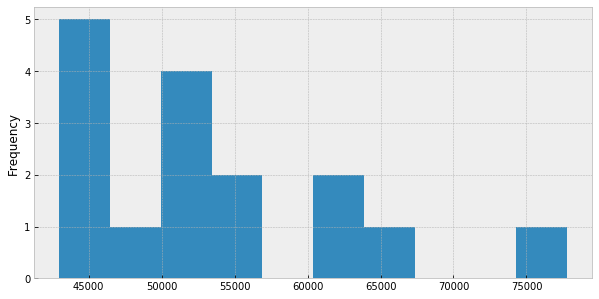

In [504]:
m = majors.groupby("Major_category")['Median'].mean()
m.plot(kind="hist",figsize=(10,5))
plt.show()

### 9. What are the top 10 most UNemployed majors?

In [174]:
majors.sort_values(by="Unemployed",ascending=False).head(10)

Major               Major_category  \
161  BUSINESS MANAGEMENT AND ADMINISTRATION                     Business   
158                        GENERAL BUSINESS                     Business   
114                              PSYCHOLOGY     Psychology & Social Work   
159                              ACCOUNTING                     Business   
13                           COMMUNICATIONS  Communications & Journalism   
73          ENGLISH LANGUAGE AND LITERATURE    Humanities & Liberal Arts   
164        MARKETING AND MARKETING RESEARCH                     Business   
132        POLITICAL SCIENCE AND GOVERNMENT               Social Science   
25                        GENERAL EDUCATION                    Education   
78                                  BIOLOGY       Biology & Life Science   

       Total  Employed  Unemployed  Unemployment_rate  Median  P25th     P75th  
161  3123510   2354398      147261           0.058865   58000  39500   86000.0  
158  2148712   1580978       85626           0.051378   60000  40000   95000.0  
114  1484075   1055854       79066           0.069667   45000  31000   68000.0  
159  1779219   1335825       75379           0.053415   65000  42500  100000.0  
13    987676    790696       54390           0.064360   50000  35000   80000.0  
73   1098647    708882       52248           0.068645   50000  32900   75000.0  
164  1114624    890125       51839           0.055033   56000  38500   90000.0  
132   748956    541630       40376           0.069374   58000  38000   90000.0  
25   1438867    843693       38742           0.043904   43000  32000   59000.0  
78    839454    583079       36757           0.059301   51000  35000   80000.0

### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [176]:
majors.groupby("Major_category")['Unemployed'].mean().sort_values(ascending=False).head(10)

Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

## Section 3: FIFA Soccer Game data

In [354]:
df = pd.read_csv('../data/fifa_data.csv')
#df.head()
#df.info()
#df.columns
#df.columns.tolist()
#df.Preffered_Position.unique()

### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [355]:
def clean_up(fifa):
    fifa.columns = map(str.lower, fifa.columns)
    fifa.set_index("name",inplace=True)
    fifa.drop(["national_position","national_kit","club_kit","club_joining","contract_expiry"], axis=1, inplace=True)
    cols =[c for c in fifa.columns if not c.lower().startswith('gk_') ]
    fifa = fifa[cols]
    fifa=fifa[fifa.rating > 70]
    fifa[['height']]=fifa.height.str.replace(' cm','')
    fifa[['weight']]=fifa.weight.str.replace(' kg','')
    fifa[['height','weight']]=fifa[['height','weight']].astype(float)
    fifa.isnull().sum()
    fifa.dropna()
    return fifa

In [356]:
df2 = clean_up(df)

In [357]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
Index: 4630 entries, Cristiano Ronaldo to Romario Benzar
Data columns (total 42 columns):
nationality           4630 non-null object
club                  4630 non-null object
club_position         4629 non-null object
rating                4630 non-null int64
height                4630 non-null float64
weight                4630 non-null float64
preffered_foot        4630 non-null object
birth_date            4630 non-null object
age                   4630 non-null int64
preffered_position    4630 non-null object
work_rate             4630 non-null object
weak_foot             4630 non-null int64
skill_moves           4630 non-null int64
ball_control          4630 non-null int64
dribbling             4630 non-null int64
marking               4630 non-null int64
sliding_tackle        4630 non-null int64
standing_tackle       4630 non-null int64
aggression            4630 non-null int64
reactions             4630 non-null int64
attacking_position   

(4630, 42)

### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [358]:
col=['speed','marking','finishing']

for c in col:
    print c.upper()
    print df2[c].sort_values(ascending=False).head()
    print "\n"
    

SPEED
name
Jonathan Biabiany            96
Pierre-Emerick Aubameyang    96
Víctor Ibarbo                95
Williams                     95
Gareth Bale                  95
Name: speed, dtype: int64


MARKING
name
Giorgio Chiellini    92
Jérôme Boateng       90
Thiago Silva         90
Andrea Barzagli      90
Miranda              89
Name: marking, dtype: int64


FINISHING
name
Lionel Messi          95
Luis Suárez           94
Cristiano Ronaldo     93
Gonzalo Higuaín       92
Robert Lewandowski    91
Name: finishing, dtype: int64




### 3. Who is the tallest French lefted foot player?

In [359]:
ff=df2[(df2.nationality == 'France') & (df2.preffered_foot == 'Left')]
ff.height.sort_values(ascending=False).head(1)

#df2.nationality.unique()

name
Thomas Didillon    193.0
Name: height, dtype: float64

### 4. Show a pandas series of every attribute's correlation with the rating attribute

In [360]:
df2.corr().rating


rating                1.000000
height                0.062002
weight                0.070265
age                   0.032832
weak_foot             0.119383
skill_moves           0.129214
ball_control          0.160762
dribbling             0.129167
marking               0.014391
sliding_tackle        0.037831
standing_tackle       0.046609
aggression            0.066394
reactions             0.676155
attacking_position    0.119444
interceptions         0.066953
vision                0.251631
composure             0.340877
crossing              0.105331
short_pass            0.195568
long_pass             0.185666
acceleration          0.087132
speed                 0.092125
stamina               0.079008
strength              0.089955
balance               0.041867
agility               0.107170
jumping               0.097195
heading               0.070283
shot_power            0.129757
finishing             0.131914
long_shots            0.126706
curve                 0.142745
freekick

### 5. Make a heatmap of the dataset's correlation table

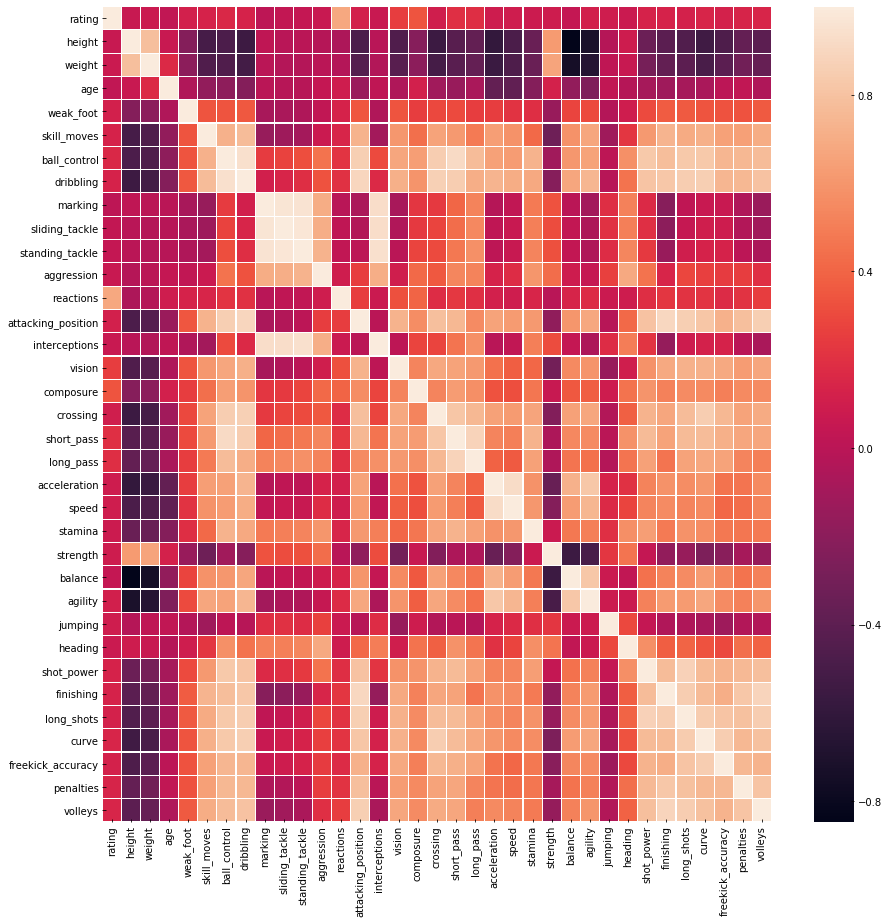

In [376]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),linewidths=.1)
plt.show()

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [406]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
       'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']
fifa2 = pd.DataFrame()
for c in clubs_list:
    fifa2= fifa2.append(df2[df2.club == c])
fifa2.shape

(270, 42)

### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

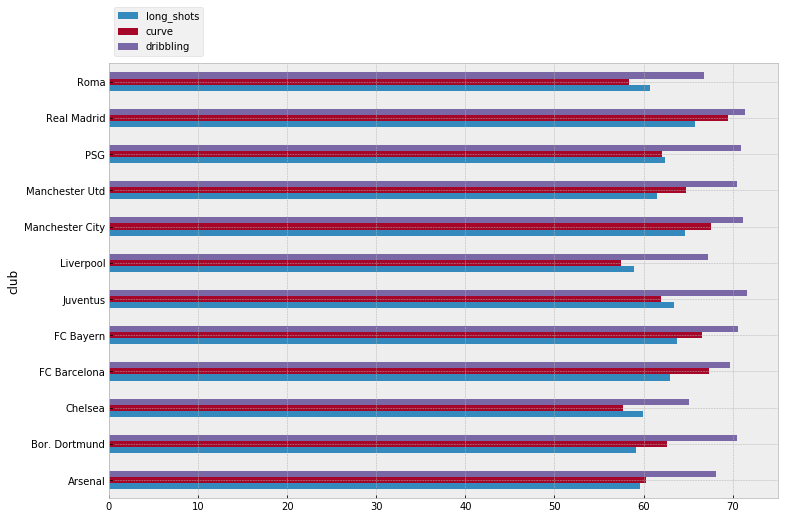

In [470]:
cc = fifa2.groupby('club').mean()[['long_shots','curve','dribbling']]
cc.plot(kind="barh",figsize=(12,8))
plt.legend(loc='upper left', bbox_to_anchor=(0.,1.04,1.,.102))
plt.show()

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.

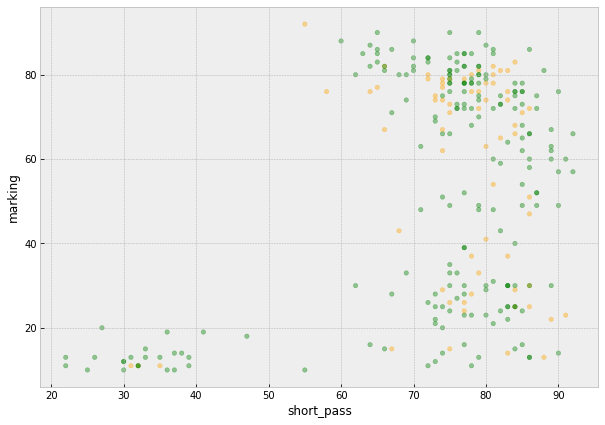

In [480]:
color_dict= {'Right':'green','Left':'orange'}
colors = fifa2.preffered_foot.map(color_dict)
fifa2.plot(x="short_pass", y="marking", kind="scatter", c=colors, figsize=(10, 7), alpha=.4)
plt.show()

### 9. Make a grouped boxplots using club_position as the x axis for the following attributes: dribbling, balance, and sliding_tackle

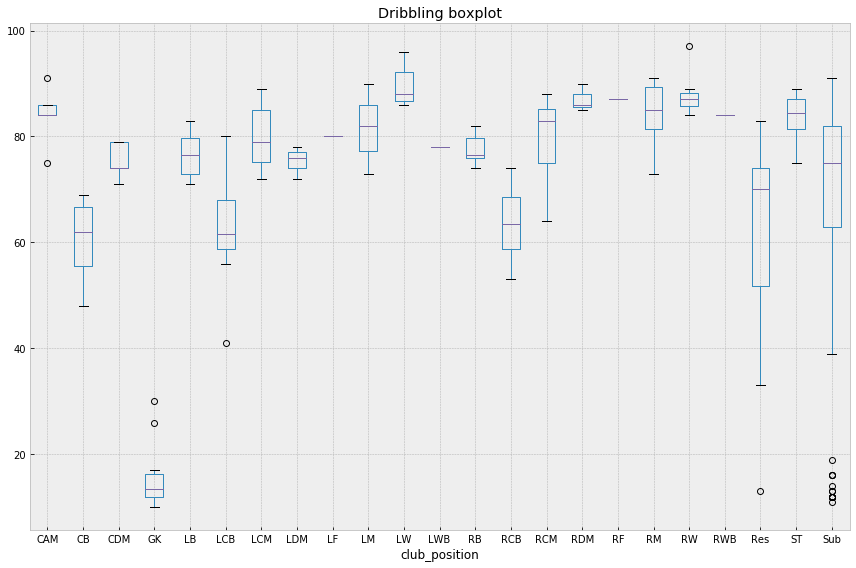

In [498]:
#Dribbling boxplot
fifa2.boxplot(column='dribbling', by='club_position',figsize=(12,8))
plt.suptitle("")
plt.title("Dribbling boxplot")
plt.tight_layout()
plt.show()

Which position is better at dribbling? ST or RCM? Why?

ST, becasue ST has higher minimum and median

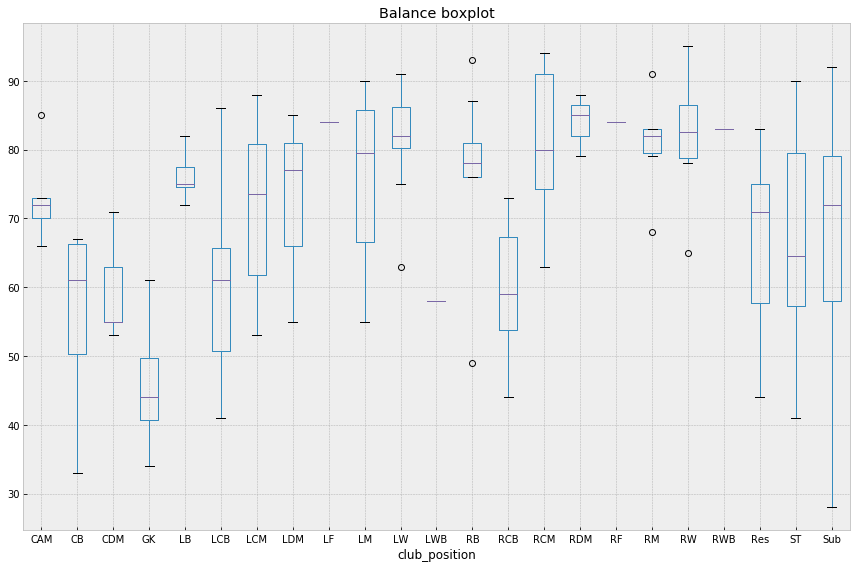

In [497]:
#Balance boxplot
fifa2.boxplot(column='balance', by='club_position',figsize=(12,8))
plt.suptitle("")
plt.title("Balance boxplot")
plt.tight_layout()
plt.show()

Which position is better at balance? LM or LDM? Why?

LM, because LM has higher max and median

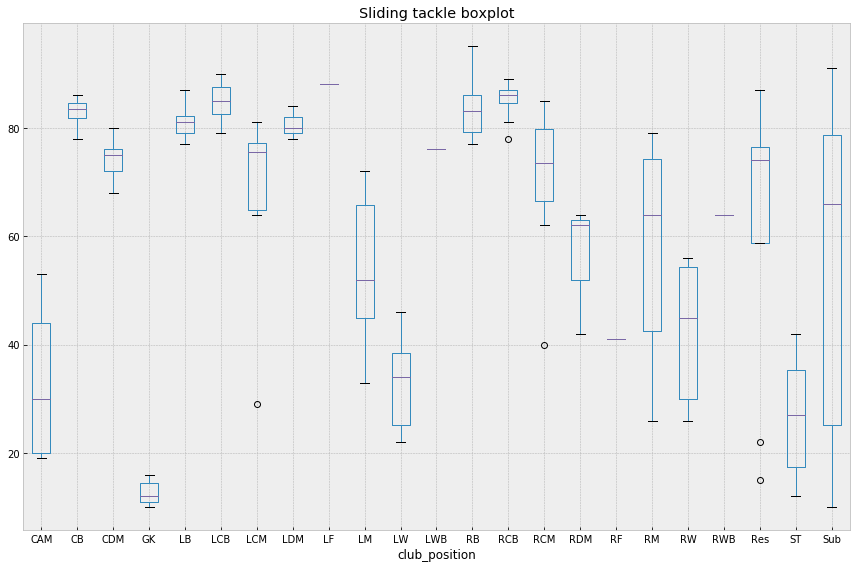

In [499]:
#sliding_tackle boxplot
fifa2.boxplot(column='sliding_tackle', by='club_position',figsize=(12,8))
plt.suptitle("")
plt.title("Sliding tackle boxplot")
plt.tight_layout()
plt.show()

What is the IQR for positions ST, RB, and RM?

ST:34 to 17, RB:88 to 78, RM:73 to 43 